# Gradient Boosting

[Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) is a **boosting** ensemble method, as opposed to random forest which is a **bagging** ensemble model. Another well-known boosting ensemble method is AdaBoost (Adaptive Bossting). 

## Basics

Similar to bagging, boosting typically combine decision trees as weak/simple learners to achieve a strong learner, known as tree boosting or boosted trees. However, different from bagging like random forests, each tree in boosting is **dependent** on prior trees. 

<img src='../figs/13_GradientBoost.png' width = '600'>

Models are fit using a differentiable loss function and gradient descent algorithm on the **function space**. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit:

1. learn a constant estimator $f_0$ on the data as the initial tree boosting $F_0 = f_0$.

2. Repeat for $m = 1, 2, \dots, M$:  

   * predict using current ensemble model $F_{m-1}$.

   * calculate some residual error of $F_{m-1}$ for each training sample, **take the residual as the target/label to fit a new tree $T_M$**.   
   
   * update the boosted trees $F_m = F_{m-1} + \gamma T_m$, for some proper $\gamma\in(0,1)$ resembling the **learning rate** in gradient descent.
   
The algorithm resembles gradient descent on the **function space**, justifying the name 'gradient boosting'. This is different from conventional gradient methods which operate on **parameter space**.

### The Algorithm

   
The gradient boosting algorithm is described as follows:
   
<img src='../figs/13_GB_Algo.png'>

The algorithm works in both regression and classification settings:

- For regression with squared loss: 
$$L(y, F(x)) = \frac{1}{2}(y - F(x))^2,$$ 
the pseudo residuals are 
$$
r_i = - \frac{\partial L (y_i, F(x_i))}{\partial F} = y_i - F(x_i), \; i = 1,\dots, n
$$

- For binary classification with cross-entropy loss:
$$
L(y, F(x)) = -y\log p(x) - (1-y)\log(1-p(x)) =  - y F(x) + \log (1 + e^{F(x)}),
$$
where $F(x) = \log \frac{p(x)}{1-p(x)}$ is the logit or log-odds,
the pseudo residuals are 
$$
r_i = - \frac{\partial L (y_i, F(x_i))}{\partial F} = y_i - \frac{1}{1 + e^{-F(x_i)}}, \; i = 1,\dots, n
$$
and the sigmoind function $\frac{1}{1 + e^{-F(x_i)}} = p(x_i)$ represents the predicted probability.

Essentially, the algorithm iteratively updates a decision function $F(x)$ until 

$$
\frac{\partial L (y_i, F(x_i))}{\partial F} = 0, \; \mbox{for} \; i = 1,\dots, n
$$

#### Early stopping 

Unlike bagging, it is possible for boosting to overfit, by adding too many classifiers. The solution
that is normally used practice is a procedure called early stopping. The idea is to monitor the errors on the
testing set, which will generally decrease along with training errors as the algorithm proceeds. However, at some point, if the testing error will begin to get noticeably worse, we revert the classifier to
the status that gave the best test error, and discard any subsequent changes, i.e., additional weak
classifiers.

## XGBoost

[XGBoost](https://en.wikipedia.org/wiki/XGBoost) (eXtreme Gradient Boosting) is a scalable open-source machine learning system under the Gradient Boosting framework. The impact of the system has been widely recognized in a number of machine learning and data mining challenges. It became well known in the machine learning competition circles after its use in the winning solution of the Higgs Machine Learning Challenge. Many of the winning solutions in Kaggle competitions have used XGBoost to train models. 

**XGBoost and ``sklearn``'s GradientBoosting, are fundamentally the same as they are both gradient boosting implementations**.
However, there are very significant differences under the hood in a practical sense. By using several tricks, **XGBoost is a lot faster than ``sklearn``.** 

## Example 1: Boston Housing Prediction

We will be using XGBoost to solve a regression problem. The dataset is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and is also present in sklearn's datasets module. It has 14 explanatory variables describing various aspects of residential homes in Boston, the challenge is to predict the median value of owner-occupied homes per $1000's.

Install XGBoost: ``conda install -c conda-forge xgboost``

In [40]:
from sklearn.datasets import load_boston
boston = load_boston()

In [41]:
print(boston.keys())
print()
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [119]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [120]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [121]:
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


Import libraries including ``xgboost``:

In [123]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [124]:
X, y = np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1])

#### Train-test splitting

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Instantiate an XGBoost regressor object by calling the ``XGBRegressor()`` class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the ``XGBClassifier()`` class.

In [126]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, n_estimators = 10)
# colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
# learning_rate: 'learning rate' for gradient boosting. Range is [0,1]

In [127]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [128]:
print("RMSE: %f" % np.sqrt(mean_squared_error(y_test, preds)))

RMSE: 10.397587


The RMSE for the price prediction came out to be around 10.4 per $1000.


### Cross Validation

XGBoost supports k-fold cross validation via the ``cv()`` method. 

* ``num_boost_round`` denotes the number of trees you build (analogous to ``n_estimators``). 

* ``as_pandas = True`` returns the results in a pandas DataFrame. 

* ``early_stopping_rounds`` finishes training of the model early if the hold-out metric (``"rmse"`` in our case) does not improve for a given number of rounds.

**We will convert the dataset into an optimized data structure called ``Dmatrix`` that XGBoost supports and gives it acclaimed performance and efficiency gains.**

In [129]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [130]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680255,0.025604,21.719119,0.019027
1,19.740498,0.072069,19.818879,0.061769
2,18.007202,0.119743,18.109863,0.129374
3,16.463924,0.115088,16.587236,0.182337
4,14.990312,0.112000,15.132977,0.166282


In [131]:
print((cv_results["test-rmse-mean"]).tail(1))

9    10.147332
Name: test-rmse-mean, dtype: float64


We increase the boosting round (i.e., number of boosted trees) to 50:

In [132]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

``cv_results`` contains train and test RMSE metrics for each boosting round

In [133]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680255,0.025604,21.719119,0.019027
1,19.740498,0.072069,19.818879,0.061769
2,18.007202,0.119743,18.109863,0.129374
3,16.463924,0.115088,16.587236,0.182337
4,14.990312,0.112000,15.132977,0.166282


In [134]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.862102
Name: test-rmse-mean, dtype: float64


The RMSE for the price prediction has reduced as compared to last time with more boosting rounds and came out to be around 3.86 per 1000$. 

### Visualize Boosting Trees and Feature Importance

XGBoost has a ``plot_tree`` function that visualizes individual trees.
 
Once you train a model using the XGBoost learning API, you can pass it to the ``plot_tree`` function along with the index of tree you want to plot using the ``num_trees`` argument.

In [135]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

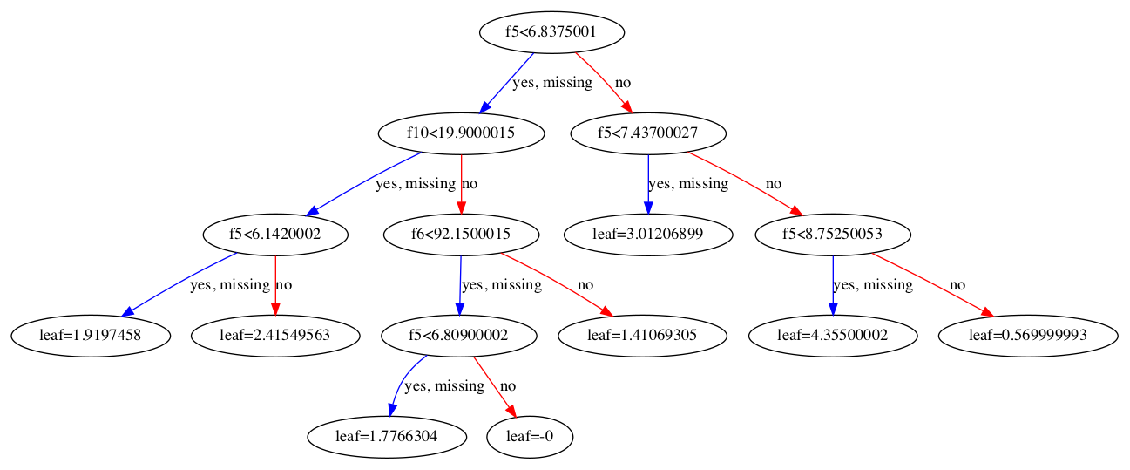

In [136]:
ax = xgb.plot_tree(xg_reg,num_trees=0) # num_trees: specify the ordinal number of target tree
ax.figure.set_size_inches(20,20)

The leaf value is the prediction of that tree for the given data point. The prediction of XGBoost is the combination of all leaf values.

We can visualize XGBoost models is to examine the importance of each feature column in the original dataset within the model using ``plot_importance``

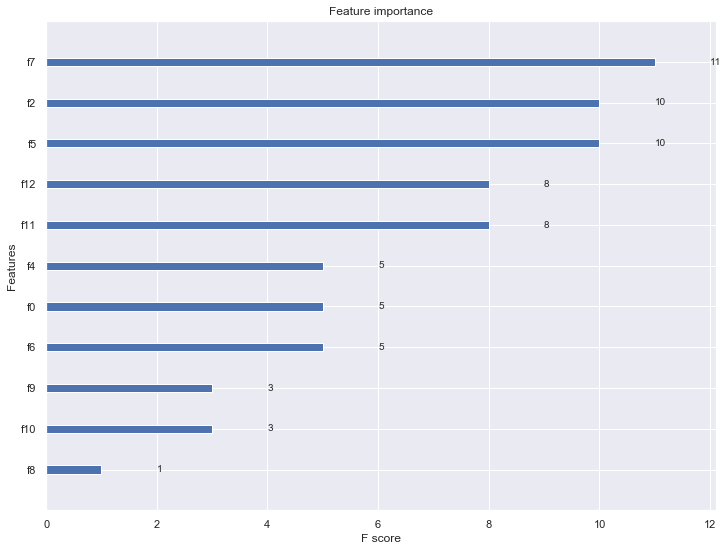

In [60]:
ax = xgb.plot_importance(xg_reg)
ax.figure.set_size_inches(12,9)

## Example 2: Heart Disease Prediction

* Features:
   1. age
   2. sex: 1 = male, 0 = female
   3. cp: chest pain type, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptotic
   4. trestbps: resting blood pressure
   5. chol: serum cholestoral in mg/dl
   6. fbs: fasting blood sugar > 120 mg/dl, 1 = true, 0 = false
   7. restecg: resting electrocardiographic results, 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy
   8. thalach: maximum heart rate achieved
   9. exang: exercise induced angina, 1 = yes, 0 = no
   10. oldpeak: ST depression induced by exercise relative to rest
   11. slop: peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
   12. ca: number of major vessels (0-3) colored by flourosopy
   13. thal: displays the thalassemia

* Target: diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not: 0 = absence, 1 = present.

In [98]:
import pandas as pd
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [100]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [101]:
# Split data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Train test split

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Instantiate a ``XGBClassifier``

In [103]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=20)

### GradSearchCV

Use ``GridSearchCV`` to choose good combination of parameters. Check out https://xgboost.readthedocs.io/en/latest/parameter.html for parameter descriptions.

In [104]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

Create a dictionary that describes the parameters we want to try and fit the ``grid`` object on training data

In [111]:
param_grid = {'n_estimators': [100, 400, 800],
             'learning_rate': [0.005, 0.01, 0.05],
             'colsample_bytree': [0.3, 0.5, 0.7],
              'sampling': [0.4,0.7],
              'max_depth': [3, 4, 5] 
             }
grid = GridSearchCV(model, param_grid, cv=5, iid = True, refit = True)

In [112]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=20, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=True, n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.005, 0.01, 0.05],
                         'max_depth': [3, 4

Inspect the best parameters found by ``GridSearchCV`` in the ``best_params_`` attribute:

In [113]:
grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.005,
 'max_depth': 3,
 'n_estimators': 800,
 'sampling': 0.4}

In [114]:
grid.best_score_

0.8370044052863436

### Evaluation

Check out test accuracy:

In [115]:
y_preds = grid.predict(X_test)
accuracy_score(y_test, y_preds)

0.8552631578947368

Visualize the ``confusion matrix`` using ``heatmap``:

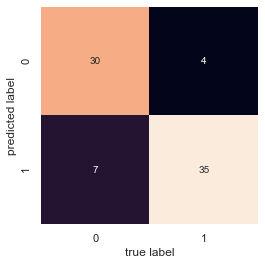

In [116]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');